In [136]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [131]:
df = pd.read_csv('../musics/output.csv', index_col=5, usecols=[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18])

In [132]:
df.head()

,acousticness,category,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
id,,,,,,,,,,,,,,
5ZQ2hn58jULkkRLCbEH0ZY,0.9800,focus,0.269,135484,0.132,0.944000,7,0.0878,-20.138,0,0.0373,122.867,4,0.0503
31u0qGiw6ZiYe4KasJi2zv,0.8150,country,0.573,167827,0.360,0.000000,5,0.2230,-10.027,1,0.0544,204.158,4,0.9510
50uGbeaQIxKiSc7jvRTjWx,0.7260,decades,0.486,166827,0.312,0.000002,2,0.0601,-13.522,1,0.0533,205.917,4,0.5980
45oFq8ZKV9KDhzYb2Rh1y4,0.0190,workout,0.651,247440,0.639,0.000000,3,0.0522,-7.836,0,0.0583,157.738,4,0.7580
5VYRZ0PFFpHX8Hp0turWxI,0.0331,workout,0.452,186000,0.936,0.000000,8,0.1970,-3.028,1,0.1900,170.120,4,0.6660


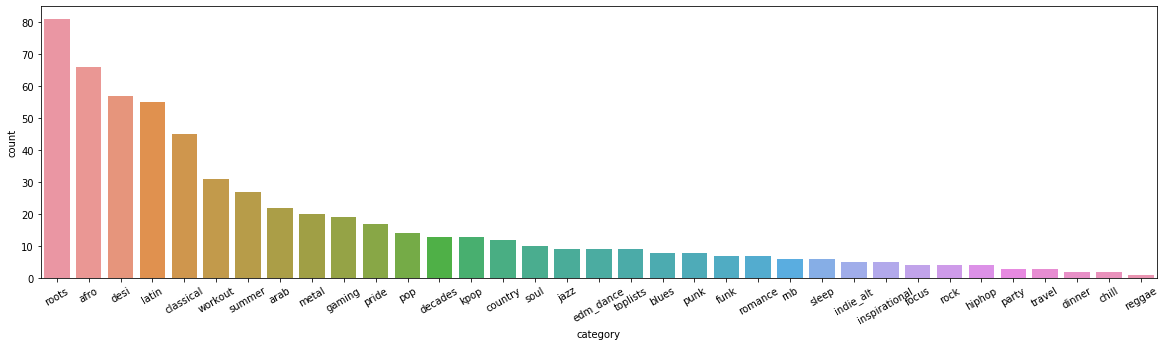

In [183]:
plt.figure(figsize=(20,5))
sns.countplot('category', data=df, order=df['category'].value_counts().index)
plt.xticks(rotation=30)
plt.show()

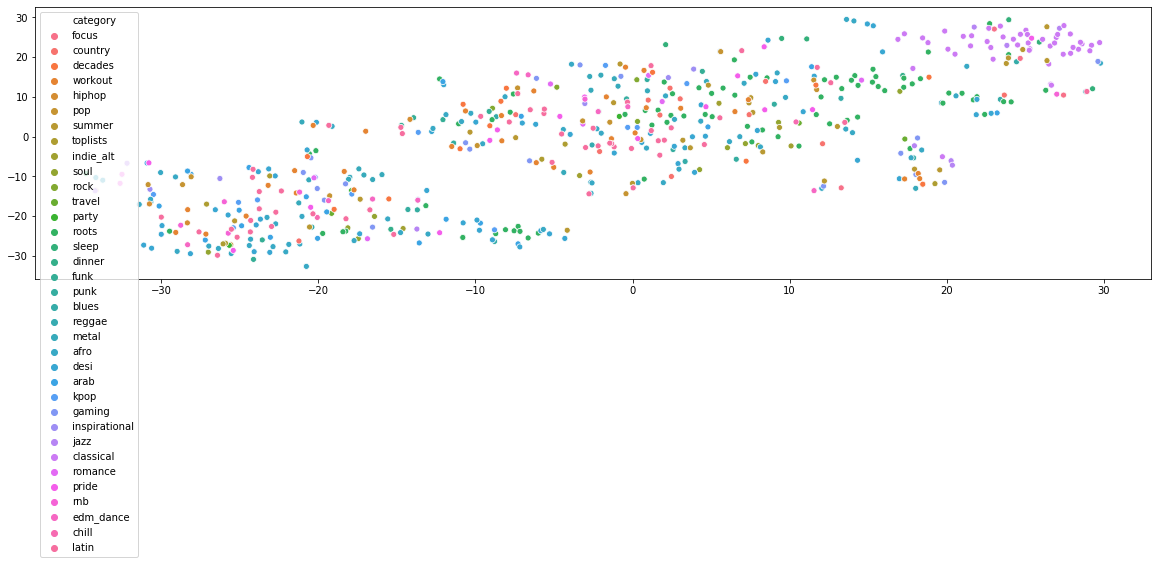

In [134]:
standard = StandardScaler()
x, y = TSNE(2).fit_transform(standard.fit_transform(df.drop('category', axis=1).values)).T
plt.figure(figsize=(20,5))
sns.scatterplot(x, y, hue=df['category'])

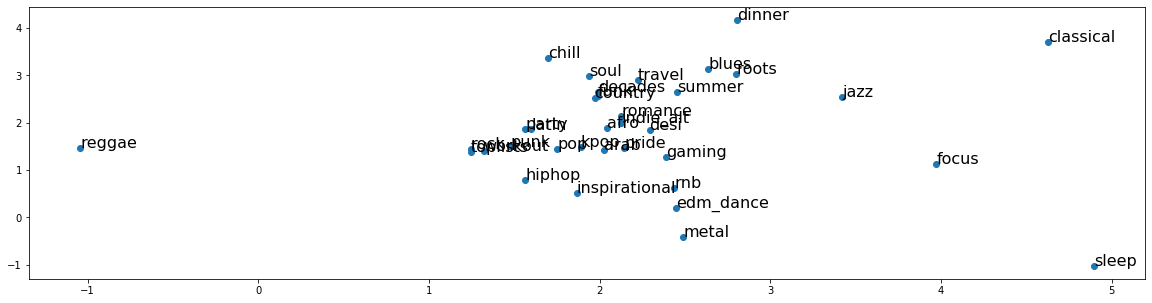

In [150]:
fig, ax = plt.subplots(figsize=(20,5))
genres = df.groupby('category').mean()
x, y = PCA(2).fit_transform(standard.fit_transform(genres.values)).T
x, _ = boxcox(x + abs(x.min()) + 0.01)
y, _ = boxcox(y + abs(y.min()) + 0.01)
x, _ = boxcox(x + abs(x.min()) + 0.01)
y, _ = boxcox(y + abs(y.min()) + 0.01)
plt.scatter(x, y)
for position, genre in zip(zip(x, y), genres.index):
    ax.annotate(genre, xy=position, size=16, rotation=0)

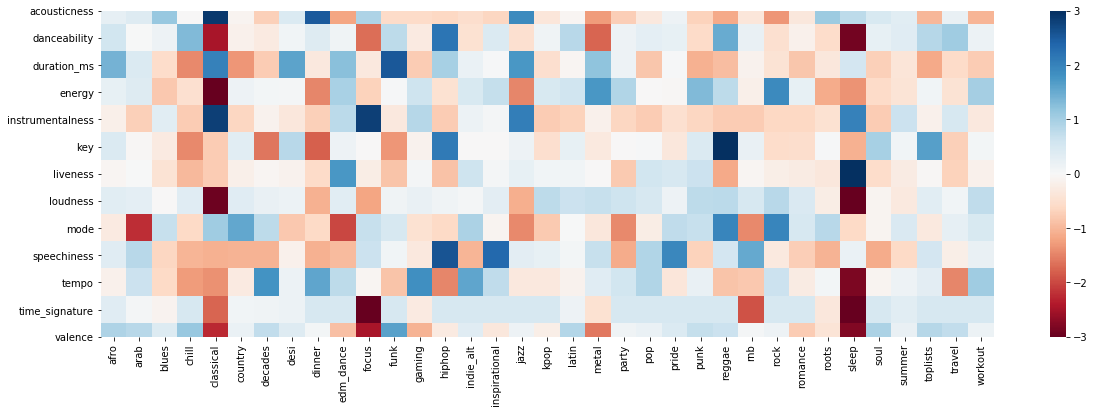

In [181]:
plt.figure(figsize=(20,6))
sns.heatmap(standard.fit_transform(genres.values).T, xticklabels=genres.index,
            yticklabels=genres.columns, cmap='RdBu', vmin=-3, vmax=3)

/Users/willian/notebooks_env/music-map/env/lib/python3.7/site-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


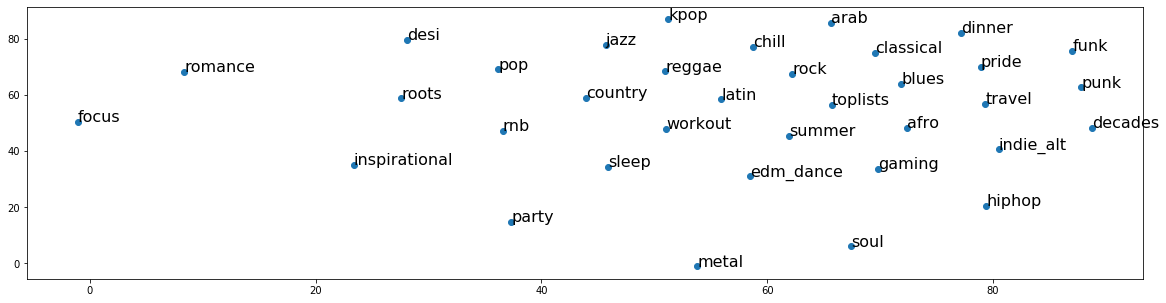

In [170]:
fig, ax = plt.subplots(figsize=(20,5))
genres = df.groupby('category').mean()
x, y = TSNE(2, perplexity=50, learning_rate=400).fit_transform(standard.fit_transform(genres.values)).T
x, _ = boxcox(x + abs(x.min()) + 0.01)
y, _ = boxcox(y + abs(y.min()) + 0.01)
x, _ = boxcox(x + abs(x.min()) + 0.01)
y, _ = boxcox(y + abs(y.min()) + 0.01)
plt.scatter(x, y)
for position, genre in zip(zip(x, y), genres.index):
    ax.annotate(genre, xy=position, size=16, rotation=0)